In [1]:
import numpy as np
import tensorflow as tf

In [2]:
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tfc

In [15]:
tfc.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


In [7]:
x = np.linspace(0, 50, 50)

In [8]:
y = np.linspace(0, 50, 50)

In [9]:
x += np.random.uniform(-4, 4, 50)
y += np.random.uniform(-4, 4, 50)

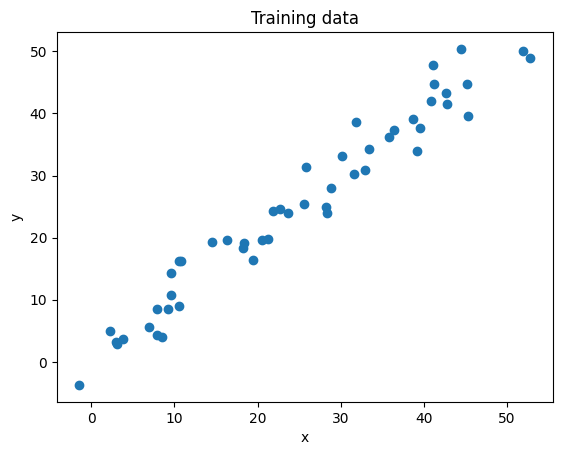

In [11]:
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Training data')
plt.show()

In [17]:
X = tfc.placeholder("float")
Y = tfc.placeholder("float")
W = tf.Variable(np.random.randn(), name = "W")
b = tf.Variable(np.random.randn(), name = "b")

In [24]:
learning_rate = 0.01
training_epochs = 1000

In [19]:
y_pred = tf.add(tf.multiply(X, W), b)

In [20]:
cost = tf.reduce_sum(tf.pow(y_pred-Y, 2)) / (2 * len(x))

In [21]:
optimizer_gradient = tfc.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [22]:
init = tfc.global_variables_initializer()

In [25]:
with tfc.Session() as sess:
    sess.run(init)

    for epoch in range(training_epochs):
        for (_x, _y) in zip(x, y):
            sess.run(optimizer_gradient, feed_dict = {X : _x, Y : _y})
        if (epoch + 1) % 50 == 0:
            c = sess.run(cost, feed_dict = {X : x, Y : y})
            print("Epoch", (epoch + 1), ": cost =", c, "W =", sess.run(W), "b =", sess.run(b))
     
    training_cost = sess.run(cost, feed_dict ={X: x, Y: y})
    weight = sess.run(W)
    bias = sess.run(b)

Epoch 50 : cost = 5.7002263 W = 0.95363176 b = 0.2706268
Epoch 100 : cost = 5.6357627 W = 0.95094514 b = 0.40629265
Epoch 150 : cost = 5.5835257 W = 0.948544 b = 0.5275469
Epoch 200 : cost = 5.541141 W = 0.94639784 b = 0.63592136
Epoch 250 : cost = 5.5066977 W = 0.94447964 b = 0.7327817
Epoch 300 : cost = 5.478652 W = 0.9427653 b = 0.81935406
Epoch 350 : cost = 5.455781 W = 0.941233 b = 0.8967301
Epoch 400 : cost = 5.437089 W = 0.9398635 b = 0.9658866
Epoch 450 : cost = 5.421782 W = 0.9386395 b = 1.0276946
Epoch 500 : cost = 5.4092197 W = 0.93754554 b = 1.0829365
Epoch 550 : cost = 5.3988843 W = 0.9365678 b = 1.1323094
Epoch 600 : cost = 5.390361 W = 0.935694 b = 1.1764344
Epoch 650 : cost = 5.383312 W = 0.9349129 b = 1.2158744
Epoch 700 : cost = 5.377464 W = 0.9342149 b = 1.2511255
Epoch 750 : cost = 5.372603 W = 0.93359095 b = 1.2826328
Epoch 800 : cost = 5.3685455 W = 0.9330333 b = 1.310793
Epoch 850 : cost = 5.365156 W = 0.9325349 b = 1.3359594
Epoch 900 : cost = 5.3623123 W = 0.93

In [26]:
predictions = weight * x + bias
print("Training cost =", 
      training_cost, 
      "Weight =", weight, 
      "bias =", bias, '\n')

Training cost = 5.357889 Weight = 0.93133515 bias = 1.3965431 



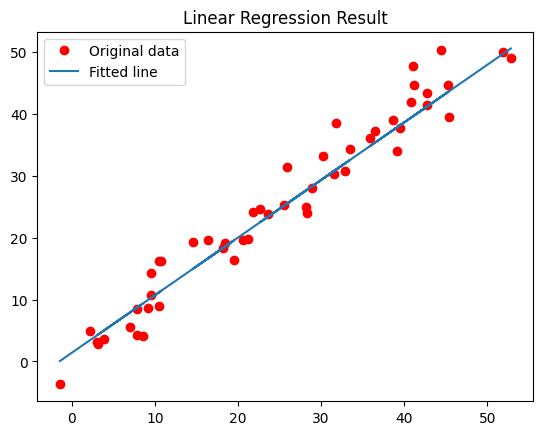

In [27]:
plt.plot(x, y, 'ro', label ='Original data')
plt.plot(x, predictions, label ='Fitted line')
plt.title('Linear Regression Result')
plt.legend()
plt.show()